* **"Hands on ... "**
**Chapter 10. Introduction to Artificial Neural Networks with Keras**

* **"Deep Learning with Python, Chollet" - 3.6 Predicting house prices: a regression example**
* **TensorFlow Tutorial**
[TensorFlow](https://www.tensorflow.org/tutorials/keras/regression?hl=ko)

# Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

from preamble import *
%matplotlib inline

import os
import sys
print("Python 버전:", sys.version)

import pandas as pd
print("pandas 버전:", pd.__version__)

import numpy as np
print("NumPy 버전:", np.__version__)

import scipy as sp
print("SciPy 버전:", sp.__version__)

import IPython
print("IPython 버전:", IPython.__version__)

import sklearn
print("scikit-learn 버전:", sklearn.__version__)


# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

Python 버전: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
pandas 버전: 1.1.5
NumPy 버전: 1.16.6
SciPy 버전: 1.5.0
IPython 버전: 7.18.1
scikit-learn 버전: 0.22


# Hands on ....
### Predicting house prices: a regression example

This notebook contains the code samples found in Chapter 3, Section 6 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

----


In our two previous examples, we were considering classification problems, where the goal was to predict a single discrete label of an
input data point. Another common type of machine learning problem is "regression", which consists of predicting a continuous value instead
of a discrete label. For instance, predicting the temperature tomorrow, given meteorological data, or predicting the time that a
software project will take to complete, given its specifications.

Do not mix up "regression" with the algorithm "logistic regression": confusingly, "logistic regression" is not a regression algorithm,
it is a classification algorithm.

## The Boston Housing Price dataset


We will be attempting to predict the median price of homes in a given Boston suburb in the mid-1970s, given a few data points about the
suburb at the time, such as the crime rate, the local property tax rate, etc.

The dataset we will be using has another interesting difference from our two previous examples: it has very few data points, only 506 in
total, split between 404 training samples and 102 test samples, and each "feature" in the input data (e.g. the crime rate is a feature) has
a different scale. For instance some values are proportions, which take a values between 0 and 1, others take values between 1 and 12,
others between 0 and 100...

Let's take a look at the data:

In [2]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)


As you can see, we have 404 training samples and 102 test samples. The data comprises 13 features. The 13 features in the input data are as
follow:

1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. % lower status of the population.

The targets are the median values of owner-occupied homes, in thousands of dollars:

In [5]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13


The prices are typically between \$10,000 and \$50,000. If that sounds cheap, remember this was the mid-1970s, and these prices are not
inflation-adjusted.

## Preparing the data


It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to
automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal
with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), we
will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a
unit standard deviation. This is easily done in Numpy:

In [6]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std


Note that the quantities that we use for normalizing the test data have been computed using the training data. We should never use in our
workflow any quantity computed on the test data, even for something as simple as data normalization.

## Building our network


Because so few samples are available, we will be using a very small network with two
hidden layers, each with 64 units. In general, the less training data you have, the worse overfitting will be, and using
a small network is one way to mitigate overfitting.

In [7]:
from tensorflow import keras

from keras import models
from keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


Our network ends with a single unit, and no activation (i.e. it will be linear layer).
This is a typical setup for scalar regression (i.e. regression where we are trying to predict a single continuous value).
Applying an activation function would constrain the range that the output can take; for instance if
we applied a `sigmoid` activation function to our last layer, the network could only learn to predict values between 0 and 1. Here, because
the last layer is purely linear, the network is free to learn to predict values in any range.

Note that we are compiling the network with the `mse` loss function -- Mean Squared Error, the square of the difference between the
predictions and the targets, a widely used loss function for regression problems.

We are also monitoring a new metric during training: `mae`. This stands for Mean Absolute Error. It is simply the absolute value of the
difference between the predictions and the targets. For instance, a MAE of 0.5 on this problem would mean that our predictions are off by
\$500 on average.

## Validating our approach using K-fold validation


To evaluate our network while we keep adjusting its parameters (such as the number of epochs used for training), we could simply split the
data into a training set and a validation set, as we were doing in our previous examples. However, because we have so few data points, the
validation set would end up being very small (e.g. about 100 examples). A consequence is that our validation scores may change a lot
depending on _which_ data points we choose to use for validation and which we choose for training, i.e. the validation scores may have a
high _variance_ with regard to the validation split. This would prevent us from reliably evaluating our model.

The best practice in such situations is to use K-fold cross-validation. It consists of splitting the available data into K partitions
(typically K=4 or 5), then instantiating K identical models, and training each one on K-1 partitions while evaluating on the remaining
partition. The validation score for the model used would then be the average of the K validation scores obtained.

In terms of code, this is straightforward:

In [8]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
#num_epochs = 100
num_epochs = 30
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [9]:
all_scores

[1.995470404624939, 2.567528486251831, 2.461477518081665, 2.5022835731506348]

In [10]:
np.mean(all_scores)

2.3816899955272675


As you can notice, the different runs do indeed show rather different validation scores, from 2.1 to 2.9. Their average (2.4) is a much more
reliable metric than any single of these scores -- that's the entire point of K-fold cross-validation. In this case, we are off by \$2,400 on
average, which is still significant considering that the prices range from \$10,000 to \$50,000.

Let's try training the network for a bit longer: 500 epochs. To keep a record of how well the model did at each epoch, we will modify our training loop
to save the per-epoch validation score log:

In [11]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

In [12]:
#num_epochs = 100
num_epochs = 40
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
# mae_history = history.history['val_mean_absolute_error']
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


We can then compute the average of the per-epoch MAE scores for all folds:

In [13]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

Let's plot this:

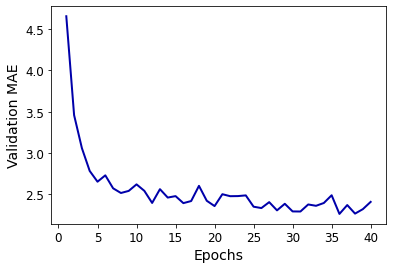

In [14]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


It may be a bit hard to see the plot due to scaling issues and relatively high variance. Let's:

* Omit the first 10 data points, which are on a different scale from the rest of the curve.
* Replace each point with an exponential moving average of the previous points, to obtain a smooth curve.

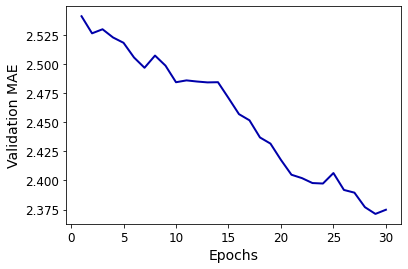

In [15]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


According to this plot, it seems that validation MAE stops improving significantly after 80 epochs. Past that point, we start overfitting.

Once we are done tuning other parameters of our model (besides the number of epochs, we could also adjust the size of the hidden layers), we
can train a final "production" model on all of the training data, with the best parameters, then look at its performance on the test data:

In [16]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 0s/step - loss: 15.5360 - mae: 2.4837


In [17]:
test_mae_score

2.483699321746826

We are still off by about \$2,550.

## Wrapping up


Here's what you should take away from this example:

* Regression is done using different loss functions from classification; Mean Squared Error (MSE) is a commonly used loss function for
regression.
* Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally the concept of "accuracy"
does not apply for regression. A common regression metric is Mean Absolute Error (MAE).
* When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.
* When there is little data available, using K-Fold validation is a great way to reliably evaluate a model.
* When little training data is available, it is preferable to use a small network with very few hidden layers (typically only one or two),
in order to avoid severe overfitting.

This example concludes our series of three introductory practical examples. You are now able to handle common types of problems with vector data input:

* Binary (2-class) classification.
* Multi-class, single-label classification.
* Scalar regression.

In the next chapter, you will acquire a more formal understanding of some of the concepts you have encountered in these first examples,
such as data preprocessing, model evaluation, and overfitting.


---
# for FHWA data

In [18]:
data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "FHWA.csv"))
df = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "FHWA.csv"),
                na_values=[np.nan, 'None', -999])
# to make blank to blank instead of NaN
#                keep_default_na=False, na_values=[np.nan, 'NONE', -999])
#display(df.iloc[0:1,25:])
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 29 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Project  54 non-null     int64  
 1   Name     54 non-null     object 
 2   Pile     54 non-null     object 
 3   MaxF     54 non-null     float64
 4   MaxD     54 non-null     float64
 5   Len      54 non-null     float64
 6   Dia      54 non-null     float64
 7   Qu       54 non-null     int64  
 8   Ns1      54 non-null     float64
 9   Ns2      54 non-null     float64
 10  Ns3      54 non-null     float64
 11  Ns4      54 non-null     float64
 12  Ns5      54 non-null     float64
 13  NB       54 non-null     float64
 14  Sand     54 non-null     int64  
 15  Clay     54 non-null     int64  
 16  Silt     54 non-null     int64  
 17  qc1      14 non-null     float64
 18  qc2      14 non-null     float64
 19  qc3      14 non-null     float64
 20  qc4      14 non-null     float64
 21  qc5      14 non-nu

Project     0
Name        0
Pile        0
MaxF        0
MaxD        0
Len         0
Dia         0
Qu          0
Ns1         0
Ns2         0
Ns3         0
Ns4         0
Ns5         0
NB          0
Sand        0
Clay        0
Silt        0
qc1        40
qc2        40
qc3        40
qc4        40
qc5        40
qct        40
qs1        40
qs2        40
qs3        40
qs4        40
qs5        40
qst        40
dtype: int64

#### *Add average N and Cone Resistacne*

In [19]:
df['mean_N'] = df.iloc[:, 8:13].mean(axis=1)
df['mean_qc'] = df.iloc[:, 17:22].mean(axis=1)
df['mean_qs'] = df.iloc[:, 23:28].mean(axis=1)

### *Looking for corrlations*

In [20]:
# 몇개의 열만 선택합니다
df = df[['MaxF', 'MaxD','Qu', 'Len', 'Dia', 'mean_N', 'NB','mean_qc','qct','mean_qs','qst']]
# IPython.display 함수는 주피터 노트북을 위해 포맷팅된 출력을 만듭니다
display(df.head())
df.info()

,MaxF,MaxD,Qu,Len,...,mean_qc,qct,mean_qs,qst
0,3407.3,-44.0,2700,36.6,...,NaN,NaN,NaN,NaN
1,818.5,-27.7,800,12.2,...,NaN,NaN,NaN,NaN
2,1331.8,-23.7,1180,33.0,...,4660.0,12800.0,131.8,380.0
3,1169.4,-40.7,1150,33.3,...,4660.0,12800.0,131.8,380.0
4,1770.4,-32.8,1379,25.2,...,4660.0,12800.0,131.8,380.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MaxF     54 non-null     float64
 1   MaxD     54 non-null     float64
 2   Qu       54 non-null     int64  
 3   Len      54 non-null     float64
 4   Dia      54 non-null     float64
 5   mean_N   54 non-null     float64
 6   NB       54 non-null     float64
 7   mean_qc  14 non-null     float64
 8   qct      14 non-null     float64
 9   mean_qs  14 non-null     float64
 10  qst      14 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 4.8 KB


##### *Dropping the raw with NaN for a feature*
for cone penetration data

In [21]:
#drop feature including NaN
df1 = df.dropna(axis = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MaxF    54 non-null     float64
 1   MaxD    54 non-null     float64
 2   Qu      54 non-null     int64  
 3   Len     54 non-null     float64
 4   Dia     54 non-null     float64
 5   mean_N  54 non-null     float64
 6   NB      54 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 3.1 KB


In [22]:
corr_matrix = df1.corr()
corr_matrix["Qu"].sort_values(ascending=False)

Qu        1.00
MaxF      0.99
Dia       0.78
Len       0.56
NB        0.30
mean_N    0.04
MaxD     -0.75
Name: Qu, dtype: float64

In [23]:
df.describe().loc[['max','min'],['Len','Dia', 'mean_N','NB']]

,Len,Dia,mean_N,NB
max,92.0,253.0,48.0,66.0
min,9.1,30.5,2.8,4.0


#### Target and Features

In [24]:
# extract numpy arrays
features = df.iloc[:,3:7]
X = features.values
y = df['Qu'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))
# for reset
X_0 = X.copy()
y_0 = y.copy()

X.shape: (54, 4) y.shape: (54,)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Preparing the data
### Scaler
#### Standard Scaler

In [26]:
df.describe().loc[['max','min'],['Len','Dia', 'mean_N','NB']]

,Len,Dia,mean_N,NB
max,92.0,253.0,48.0,66.0
min,9.1,30.5,2.8,4.0


In [27]:
# scale standard features only
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
#scaler_y = StandardScaler().fit(y.reshape(-1,1))
print(scaler.mean_)
#print(X)

X_scaled = scaler.transform(X)
#y_scaled = scaler_y.transform(y.reshape(-1,1))

[ 39.226 100.641  20.76   42.343]


In [28]:
y_scaled = y/1000


In [29]:
#y_0 = y.copy()
#X_0 = X.copy()
y = y_scaled.copy()
X = X_scaled.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


## Building our network

In [30]:
def build_model_FHWA():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model_FHWA = models.Sequential()
    model_FHWA.add(layers.Dense(64, activation='relu',
                           input_shape=(X_train.shape[1],)))
    model_FHWA.add(layers.Dense(64, activation='relu'))
    model_FHWA.add(layers.Dense(1))
    model_FHWA.compile(optimizer='rmsprop', loss='mse', metrics=['mae', 'mse'])
#    model_FHWA.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model_FHWA


## Validating our approach using K-fold validation

In [31]:
from tensorflow import keras

# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 30 == 0: print('')
    print('.', end='')

In [32]:
import numpy as np

k = 4
num_val_samples = len(X_train) // k
#num_epochs = 100
num_epochs = 30
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model_FHWA = build_model_FHWA()
    # Train the model (in silent mode, verbose=0)
    history=model_FHWA.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae, val_mse_2 = model_FHWA.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [33]:
model_FHWA.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [34]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,epoch
25,14.77,2.71,14.77,25
26,14.75,2.78,14.75,26
27,14.61,2.76,14.61,27
28,14.06,2.66,14.06,28
29,13.54,2.69,13.54,29


In [35]:
example_result = model_FHWA.predict(X_test)
example_result

array([[17.233],
       [ 2.583],
       [ 2.393],
       [ 2.41 ],
       [ 2.498],
       [ 4.357],
       [25.788],
       [ 3.397],
       [ 1.672],
       [15.656],
       [ 6.577],
       [ 2.319],
       [ 3.126],
       [ 4.083]], dtype=float32)

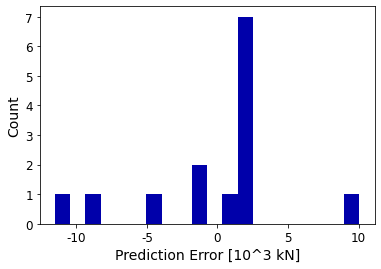

In [36]:
error = example_result - y_test.reshape(-1,1)
plt.hist(error, bins = 20)
plt.xlabel("Prediction Error [10^3 kN]")
_ = plt.ylabel("Count")

In [37]:
all_scores

[3.6351661682128906,
 3.8706557750701904,
 3.6132476329803467,
 3.5083632469177246]

In [38]:
np.mean(all_scores)


3.656858205795288

In [39]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#num_epochs = 500
num_epochs = 100
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model_FHWA = build_model_FHWA()
    # Train the model (in silent mode, verbose=0)
    history = model_FHWA.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
#                             ,callbacks=[ early_stop, PrintDot()])
# mae_history = history.history['val_mean_absolute_error']
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [40]:
amh = np.array(all_mae_histories)

print(amh)

[[8.213 7.552 7.164 6.697 6.461 6.171 5.94  5.818 5.652 5.439 5.201 5.139
  4.944 4.803 4.585 4.438 4.421 4.305 4.135 4.176 4.062 4.013 3.963 3.987
  3.883 3.806 3.81  3.793 3.76  3.736 3.693 3.696 3.693 3.68  3.621 3.646
  3.649 3.635 3.647 3.648 3.641 3.894 3.716 3.586 3.569 3.504 3.621 3.603
  3.5   3.595 3.706 3.552 3.712 3.581 3.459 3.496 3.573 3.617 3.572 3.738
  3.702 3.699 3.646 3.641 3.551 3.745 3.645 3.544 3.48  3.664 3.854 3.552
  3.496 3.496 3.623 3.615 3.582 3.522 3.561 3.708 3.481 3.568 3.531 3.533
  3.545 3.506 3.68  3.515 3.633 3.584 3.795 3.604 3.6   3.596 3.622 3.652
  3.697 3.699 3.652 3.735]
 [8.246 7.571 6.837 6.03  5.35  4.717 4.482 4.513 4.512 4.473 4.472 4.443
  4.422 4.361 4.29  4.218 4.154 4.115 4.069 4.033 3.982 3.948 3.921 3.896
  3.859 3.821 3.789 3.78  3.767 3.73  3.742 3.707 3.724 3.718 3.688 3.708
  3.704 3.645 3.675 3.682 3.659 3.613 3.623 3.658 3.676 3.705 3.679 3.641
  3.612 3.648 3.617 3.705 3.692 3.743 3.728 3.706 3.708 3.712 3.696 3.774
  3.741 3.7

We can then compute the average of the per-epoch MAE scores for all folds:

In [41]:
#for i in range(num_epochs) :
#    x2 = [x1[i] for x1 in all_mae_histories]
#    print(np.mean(x2))

average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]


Let's plot this:

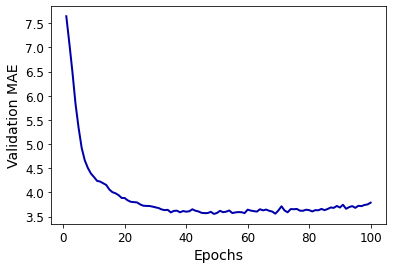

In [42]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [43]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,2.81,1.02,2.81,33.17,4.15,33.17,95
96,3.12,1.11,3.12,33.63,4.18,33.63,96
97,3.10,1.02,3.10,35.21,4.21,35.21,97
98,2.75,1.10,2.75,30.10,4.12,30.10,98
99,2.73,1.02,2.73,33.44,4.24,33.44,99


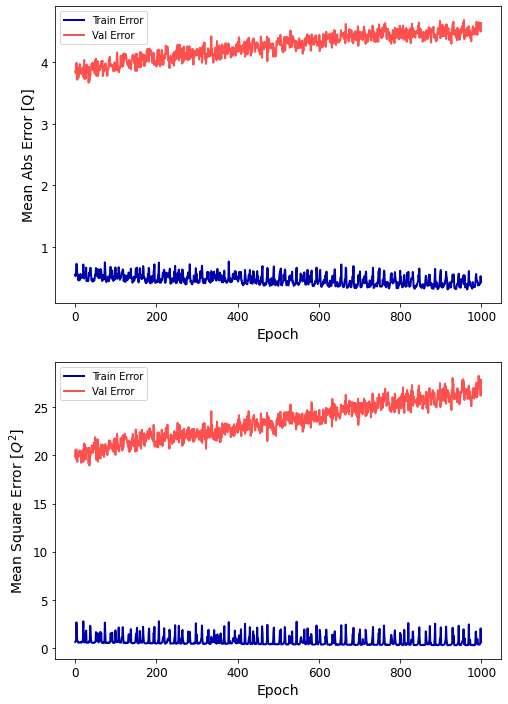

In [55]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Q]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  #plt.ylim([0,7000])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Q^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
 # plt.ylim([0,20])
  plt.legend()
  plt.show()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)


history = model_FHWA.fit(X_scaled, y_scaled, epochs=1000,
                    validation_split = 0.1, verbose=0)
                         # , callbacks=[early_stop, PrintDot()])

plot_history(history)


It may be a bit hard to see the plot due to scaling issues and relatively high variance. Let's:

* Omit the first 10 data points, which are on a different scale from the rest of the curve.
* Replace each point with an exponential moving average of the previous points, to obtain a smooth curve.

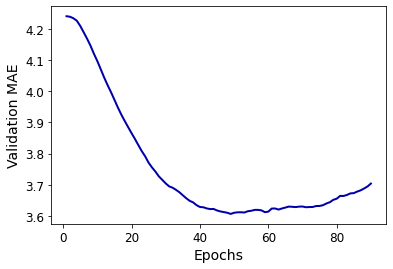

In [56]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


According to this plot, it seems that validation MAE stops improving significantly after 80 epochs. Past that point, we start overfitting.

Once we are done tuning other parameters of our model (besides the number of epochs, we could also adjust the size of the hidden layers), we
can train a final "production" model on all of the training data, with the best parameters, then look at its performance on the test data:

In [58]:
# Get a fresh, compiled model.
model_FHWA = build_model_FHWA()
# Train it on the entirety of the data.
model_FHWA.fit(X_train, y_train,
          epochs=70, batch_size=1, verbose=0)
test_mse_score, test_mae_score, temp1= model_FHWA.evaluate(X_test, y_test)

1/1 [==============================] - 0s 2ms/step - loss: 22.1146 - mae: 3.0310 - mse: 22.1146


In [59]:
test_mae_score

3.031038761138916

We are still off by about 2,830 kN.

#### not scaled y

In [62]:
y = y_0.copy()
#X_0 = X.copy()
#y = y_scaled.copy()
X = X_scaled.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [63]:
# Get a fresh, compiled model.
model_FHWA = build_model_FHWA()
# Train it on the entirety of the data.
model_FHWA.fit(X_train, y_train,
          epochs=70, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_FHWA.evaluate(X_test, y_test)

1/1 [==============================] - 0s 996us/step - loss: 31675390.0000 - mae: 3876.1960


In [64]:
test_mae_score

3876.196044921875

#### not scaled

In [65]:
y = y_0.copy()
X = X_0.copy()
#y = y_scaled.copy()
#X = X_scaled.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [66]:
# Get a fresh, compiled model.
model_FHWA = build_model_FHWA()
# Train it on the entirety of the data.
model_FHWA.fit(X_train, y_train,
          epochs=70, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_FHWA.evaluate(X_test, y_test)

1/1 [==============================] - 0s 8ms/step - loss: 15472901.0000 - mae: 3481.9202


In [67]:
test_mae_score

3481.920166015625

In [68]:
y_pred_train = model_FHWA.predict(X_train)
y_pred_test = model_FHWA.predict(X_test)

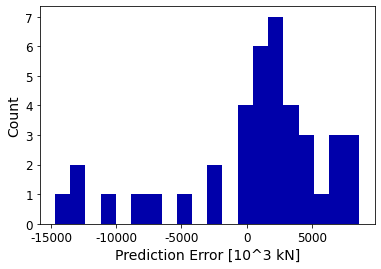

In [69]:
error = y_pred_train - y_train.reshape(-1,1)
plt.hist(error, bins = 20)
plt.xlabel("Prediction Error [10^3 kN]")
_ = plt.ylabel("Count")

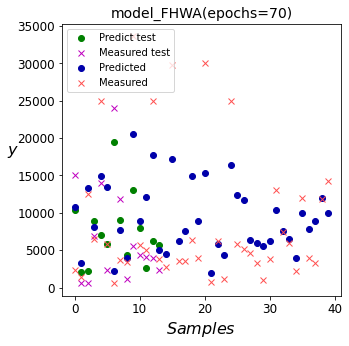

In [89]:
plt.figure(figsize=(5,5))

#plt.scatter(X_val, y_pred, color="none", edgecolor="green")
plt.plot(y_pred_test, 'go' ,label='Predict test')
plt.plot(y_test, 'mx', alpha = 1.0, label='Measured test')
#plt.legend(loc="upper right")

plt.plot(y_pred_train,  'o',label='Predicted')
plt.plot(y_train, 'x',label='Measured')

plt.title("model_FHWA(epochs=70)", fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$Samples$", fontsize=16)
plt.legend(loc=2)

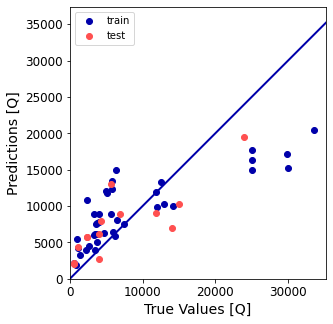

In [97]:
plt.figure(figsize=(5,5))

plt.scatter(y_train, y_pred_train, label='train')
plt.scatter(y_test, y_pred_test, label='test')
plt.xlabel('True Values [Q]')
plt.ylabel('Predictions [Q]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.legend(loc=2)
_ = plt.plot([-50, 40000], [-50, 40000])




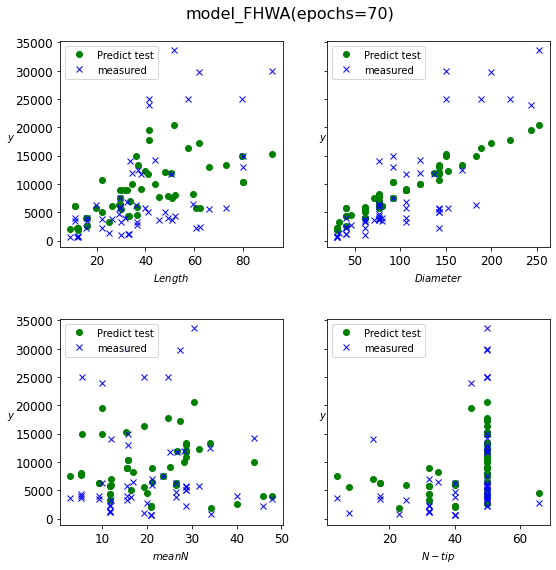

In [88]:
y_pred = model_FHWA.predict(X_0)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(8,8), sharey='all')
fig.suptitle('model_FHWA(epochs=70)', fontsize='16')

ax1.plot(X[:,0], y_pred, 'go' ,label='Predict test')
ax1.plot(X[:,0], y, 'bx' ,label='measured')
ax1.set_ylabel("$y$", fontsize=10, rotation=0)
ax1.set_xlabel("$Length$", fontsize=10)
ax1.legend(loc=2)

ax2.plot(X[:,1], y_pred, 'go' ,label='Predict test')
ax2.plot(X[:,1], y, 'bx' ,label='measured')
ax2.set_ylabel("$y$", fontsize=10, rotation=0)
ax2.set_xlabel("$Diameter$", fontsize=10)
ax2.legend(loc=2)

ax3.plot(X[:,2], y_pred, 'go' ,label='Predict test')
ax3.plot(X[:,2], y, 'bx' ,label='measured')
ax3.set_ylabel("$y$", fontsize=10, rotation=0)
ax3.set_xlabel("$mean N$", fontsize=10)
ax3.legend(loc=2)

ax4.plot(X[:,3], y_pred, 'go' ,label='Predict test')
ax4.plot(X[:,3], y, 'bx' ,label='measured')
ax4.set_ylabel("$y$", fontsize=10, rotation=0)
ax4.set_xlabel("$N-tip$", fontsize=10)
ax4.legend(loc=2)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.2)



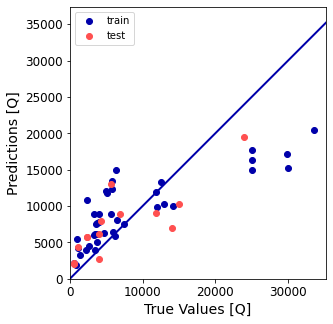

In [98]:
plt.figure(figsize=(5,5))

plt.scatter(y_train, y_pred_train, label='train')
plt.scatter(y_test, y_pred_test, label='test')
plt.xlabel('True Values [Q]')
plt.ylabel('Predictions [Q]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.legend(loc=2)
_ = plt.plot([-50, 40000], [-50, 40000])

